<a href="https://colab.research.google.com/github/maxvell07/TelecomLabs/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведём импорт необходимых библиотек и файлов:

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

--2024-05-06 00:10:21--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-05-06 00:10:21--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-05-06 00:10:21 (4.71 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# **Упражнение 10.1**

Измените пример в `chap10.ipynb` и убедитесь, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

In [2]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

--2024-05-06 00:11:17--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/180960__kleeb__gunshot.wav [following]
--2024-05-06 00:11:17--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/180960__kleeb__gunshot.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379256 (370K) [audio/wav]
Saving to: ‘180960__kleeb__gunshot.wav’

180960__kleeb__guns 100%[===================>] 370.37K  --.-KB/s    in 0.04s   

2024-05-06 00:11:17 (9.69 MB/s) - ‘180960__kleeb__gunshot.w

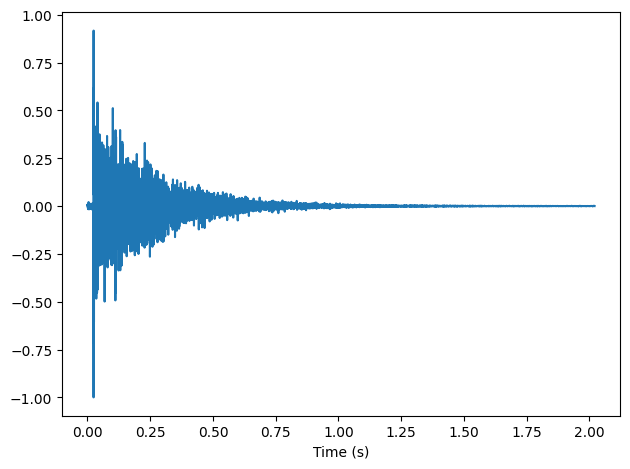

In [3]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [4]:
response.make_audio()

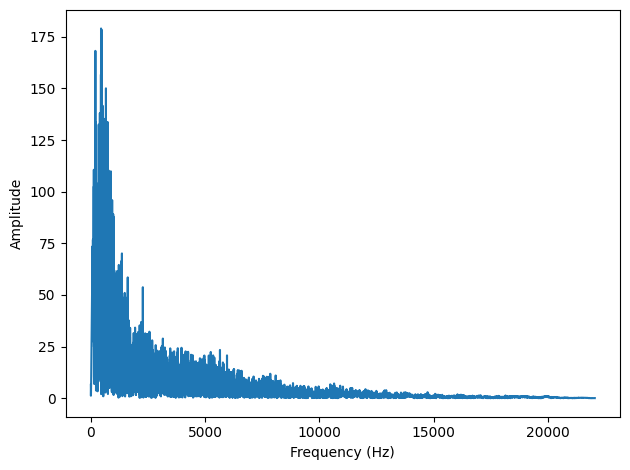

In [5]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [6]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

--2024-05-06 00:11:54--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav [following]
--2024-05-06 00:11:54--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441044 (431K) [audio/wav]
Saving to: ‘92002__jcveliz__violin-origional.wav’

92002__jcveliz__vio 100%[===================>] 430.71K  --.-KB/s    in 0.03s   

2024-05-06 00:11:55

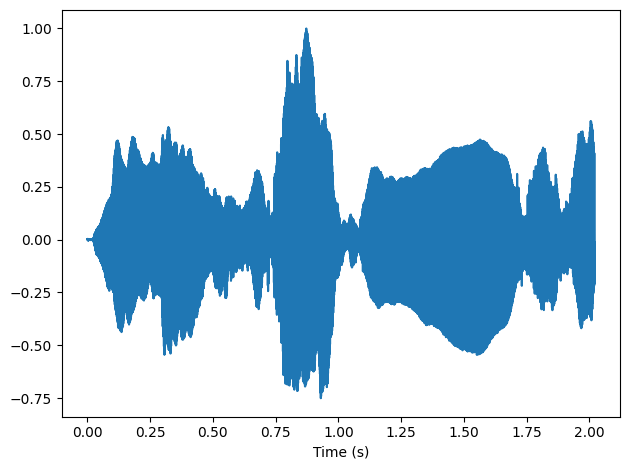

In [7]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [8]:
violin.make_audio()

In [9]:
spectrum = violin.make_spectrum()

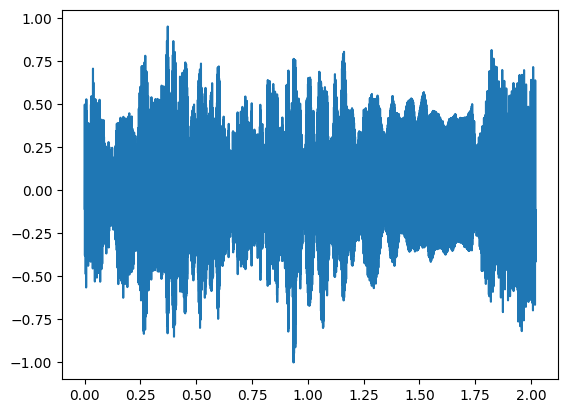

In [10]:
wave = (spectrum * transfer).make_wave()
wave.normalize()
wave.plot()

In [11]:
wave.make_audio()

Успешно устранена лишняя нота в начале фрагмента.

# **Упражнение 10.2**

Посмотрите эту [Open AIR] коллекцию импульсных характеристик и скачайте ту, звучание которой интереснее. Найдите короткие записи с той же частотой дискретизации, что и у скачанной импульсной характеристики.

Смоделируйте двумя способами звучание записи в том пространстве, где была измерена импульсная харпактеристика, как свёрткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соотвествующий импульсной характеристике.

Выполним все действия по порядку:

In [40]:
if not os.path.exists('stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

In [ ]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')
decorate(xlabel='Time (s)')

In [42]:
response.framerate

44100

ДПФ импульсной характеристики:

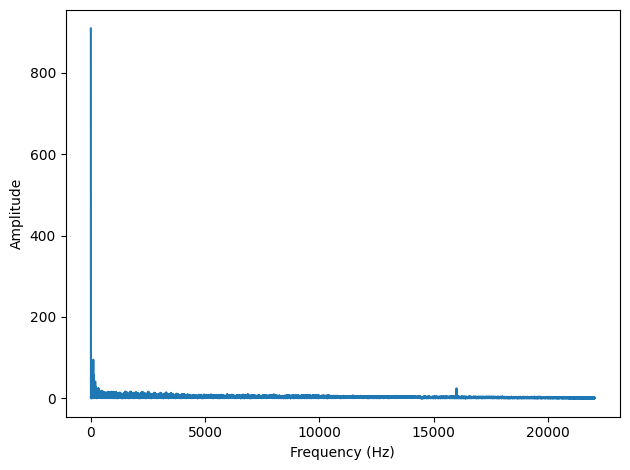

In [43]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь запись в пространстве:

In [55]:
if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

--2024-05-06 00:40:11--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav [following]
--2024-05-06 00:40:11--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540668 (1.5M) [audio/wav]
Saving to: ‘170255__dublie__trumpet.wav’

170255__dublie__tru 100%[===================>]   1.47M  --.-KB/s    in 0.05s   

2024-05-06 00:40:12 (27.6 MB/s) - ‘170255__dublie__tru

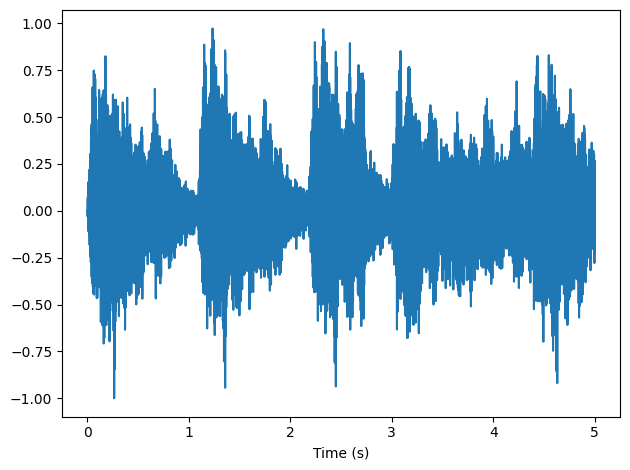

In [57]:
wave = read_wave('170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [58]:
wave.framerate

44100

In [59]:
wave.make_audio()

In [60]:
spectrum = wave.make_spectrum()

In [61]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [62]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [63]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

Свёртка:

In [64]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()

Умножение:

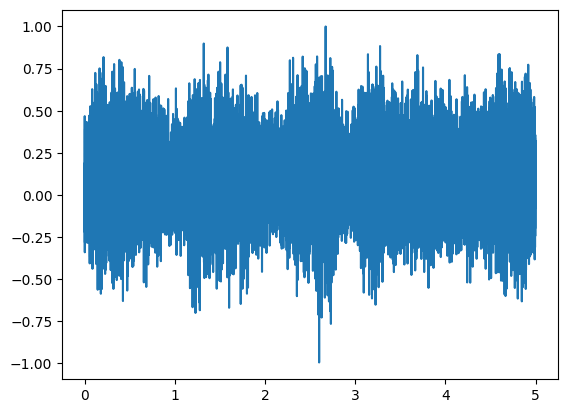

In [65]:
out_wave = (spectrum * transfer).make_wave()
out_wave.normalize()
out_wave.plot()

In [66]:
out_wave.make_audio()